# Exploring Dandiset 001275: Mental Navigation in Primate PPC

**⚠️ CAUTION: This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please be cautious when interpreting the code or results. ⚠️**

## Overview

This notebook explores Dandiset 001275, which contains neurophysiology data collected from two primates (Amadeus and Mahler) during a mental navigation task. The data is associated with the study published at https://doi.org/10.1038/s41586-024-07557-z.

You can view this dataset on Neurosift: https://neurosift.app/dandiset/001275

In this notebook, we will:
1. Load the Dandiset and examine its structure
2. Explore metadata from a specific NWB file
3. Visualize behavioral data (eye position and hand position)
4. Examine neural activity and its relationship to behavior
5. Analyze trial information from the mental navigation task

## Required Packages

The following packages are required to run this notebook:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import remfile
import pynwb
from dandi.dandiapi import DandiAPIClient

import seaborn as sns
sns.set_theme()

## Loading the Dandiset

We'll start by connecting to the DANDI archive and retrieving information about the dataset.

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001275")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 20 assets in the dataset

First 5 assets:
- sub-mahler/sub-mahler_ses-03122021_behavior+ecephys.nwb
- sub-mahler/sub-mahler_ses-03172021_behavior+ecephys.nwb
- sub-mahler/sub-mahler_ses-03152021_behavior+ecephys.nwb
- sub-mahler/sub-mahler_ses-03182021_behavior+ecephys.nwb
- sub-mahler/sub-mahler_ses-03192021_behavior+ecephys.nwb


## Exploring a Specific NWB File

For this analysis, we'll focus on a behavior+ecephys NWB file from subject Amadeus. This file contains both behavioral data and electrophysiology recordings from a single session.

In [3]:
# URL for the NWB file we'll be analyzing
url = "https://api.dandiarchive.org/api/assets/b0bbeb4c-5e0d-4050-a993-798173797d94/download/"

# Load the NWB file
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


In [4]:
# Display basic metadata about the file
print(f"NWB File: {nwb.identifier}")
print(f"Subject: {nwb.subject.subject_id}")
print(f"Species: {nwb.subject.species}")
print(f"Session ID: {nwb.session_id}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"Lab: {nwb.lab}")
print(f"Institution: {nwb.institution}")
print(f"Session Description: {nwb.session_description}")

NWB File: 15de6847-1f57-4247-847b-af4b179d1b7c
Subject: amadeus
Species: Macaca mulatta
Session ID: 01042020
Session Start Time: 2020-01-04 00:00:00-05:00
Lab: Jazayeri, Fiete
Institution: MIT
Session Description: Data from macaque performing mental navigation task. Subject is presented with a start and a target landmark, sampled from a linear map of 6 landmarks on a screen. After a delay, the subject is then cued with a go signal to navigate from start to target landmark with a joystick. Subject should respond by deflecting the joystick in the right direction and holding it until the subject thinks it has arrived at the target landmark. The visual drift or intervening landmarks are all occluded from view making the task a purely mental navigation.


## Understanding the Experimental Design

This experiment involves a mental navigation task where the subject (a macaque) is instructed to navigate between landmarks. Let's examine the trial structure to better understand the experimental design.

In [5]:
# Get trial information
trials_df = nwb.trials.to_dataframe()

# Display the first few trials
print(f"Total number of trials: {len(trials_df)}")
trials_df.head()

Total number of trials: 1885


,start_time,stop_time,ta,tp,curr,target,rt,delay,trial_type,seqq,succ,attempt,numrepeat,validtrials_mm,gocuettl,joy1offttl,joy1onttl,stim1onttl
id,,,,,,,,,,,,,,,,,,
0,4.223633,11.637167,-3.25,-2.133334,6.0,1.0,0.732311,450184.305501,3.0,1.0,0.0,2.0,0.0,1.0,5.110167,8.002300,5.860100,4.223633
1,11.637167,16.953933,-3.25,-3.066644,6.0,1.0,0.402226,512311.706711,3.0,1.0,1.0,1.0,1.0,1.0,12.586900,16.085500,13.013433,11.637167
2,16.953933,21.459433,-1.95,-1.850000,6.0,3.0,0.343430,986090.813525,3.0,1.0,1.0,1.0,0.0,1.0,18.380400,20.595133,18.738167,16.953933
3,21.459433,24.476100,-0.65,-0.649999,5.0,4.0,0.367689,682881.669062,3.0,1.0,1.0,1.0,0.0,1.0,22.578867,23.612467,22.964267,21.459433
4,24.476100,28.174800,-1.30,-1.083340,4.0,2.0,0.657287,641646.440716,3.0,1.0,1.0,1.0,0.0,1.0,25.554433,27.312467,26.220600,24.476100


In [6]:
# Explanation of trial types
trial_types = {
    1: "Linear map visible (NTS)",
    2: "Centre visible, periphery occluded",
    3: "Fully occluded (MNAV)"
}

for type_id, description in trial_types.items():
    count = (trials_df['trial_type'] == type_id).sum()
    percent = (count / len(trials_df)) * 100
    print(f"Trial Type {type_id} ({description}): {count} trials ({percent:.1f}%)")

Trial Type 1 (Linear map visible (NTS)): 334 trials (17.7%)
Trial Type 2 (Centre visible, periphery occluded): 0 trials (0.0%)
Trial Type 3 (Fully occluded (MNAV)): 1551 trials (82.3%)


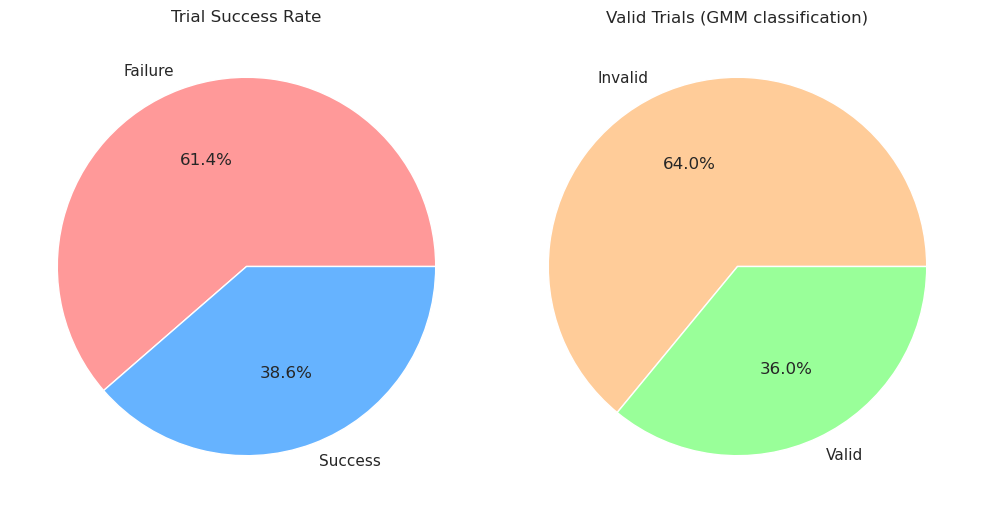

In [7]:
# Plot distribution of trial outcomes
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
success_counts = trials_df['succ'].value_counts()
plt.pie(success_counts, labels=['Failure', 'Success'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Trial Success Rate')

plt.subplot(1, 2, 2)
valid_counts = trials_df['validtrials_mm'].value_counts()
plt.pie(valid_counts, labels=['Invalid', 'Valid'], autopct='%1.1f%%', colors=['#ffcc99','#99ff99'])
plt.title('Valid Trials (GMM classification)')

plt.tight_layout()

## Behavioral Data: Eye and Hand Position

Let's visualize the eye and hand position data to understand the behavioral aspect of the experiment.

In [8]:
# Extract eye position data (sampling a subset to manage memory)
eye_data = nwb.processing["behavior"].data_interfaces["eye_position"]
sample_size = 100000  # Sample size to avoid loading too much data
step = len(eye_data.timestamps) // sample_size

# Get the sampled data
eye_timestamps = eye_data.timestamps[::step]
eye_positions = eye_data.data[::step, :]

print(f"Eye position data: {eye_data.data.shape} total samples")
print(f"Sampled {len(eye_timestamps)} points for visualization")
print(f"Conversion factor: {eye_data.conversion} {eye_data.unit}")
print(f"Reference frame: {eye_data.reference_frame}")

Eye position data: (11891095, 2) total samples
Sampled 100772 points for visualization
Conversion factor: 0.257 meters
Reference frame: (0,0) is bottom left corner of screen


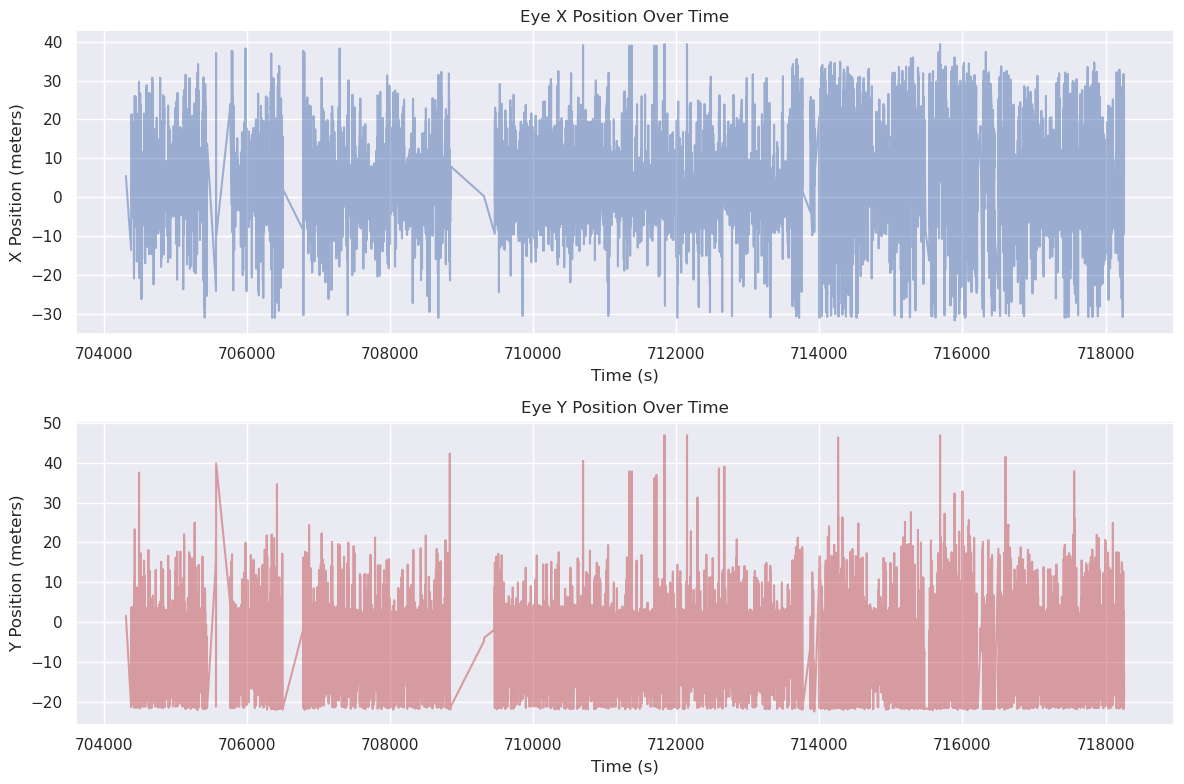

In [9]:
# Plot eye position over time
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(eye_timestamps, eye_positions[:, 0], 'b-', alpha=0.5, label='X position')
plt.xlabel('Time (s)')
plt.ylabel(f'X Position ({eye_data.unit})')
plt.title('Eye X Position Over Time')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(eye_timestamps, eye_positions[:, 1], 'r-', alpha=0.5, label='Y position')
plt.xlabel('Time (s)')
plt.ylabel(f'Y Position ({eye_data.unit})')
plt.title('Eye Y Position Over Time')
plt.grid(True)

plt.tight_layout()

(-35.20635624112685,
 42.895593454261615,
 -25.819974117279052,
 50.355596141815184)

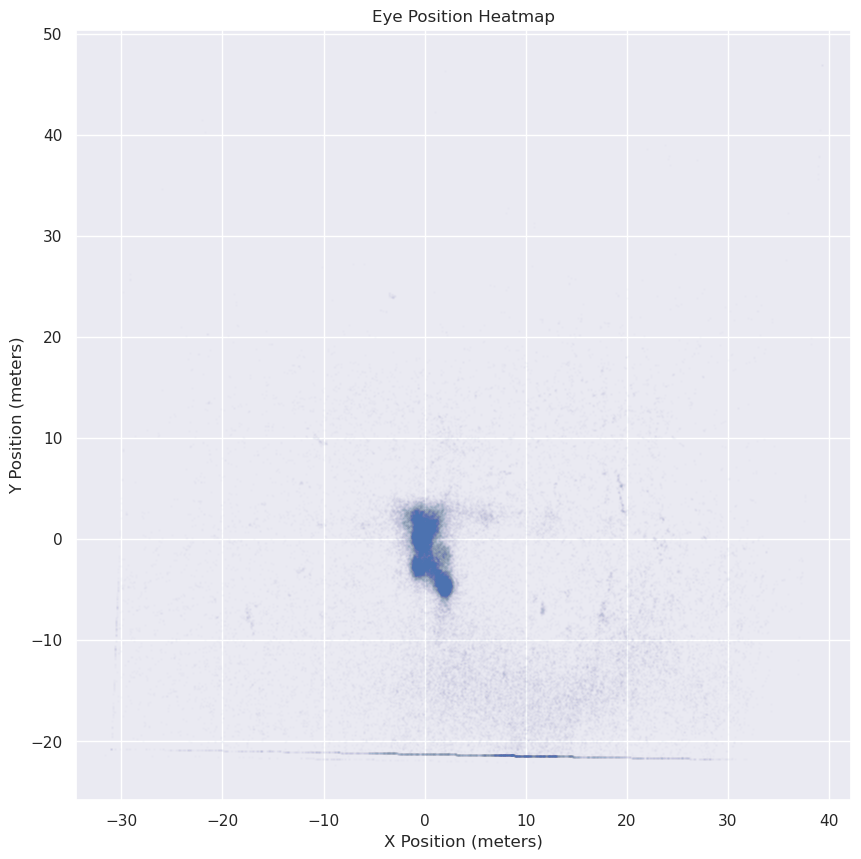

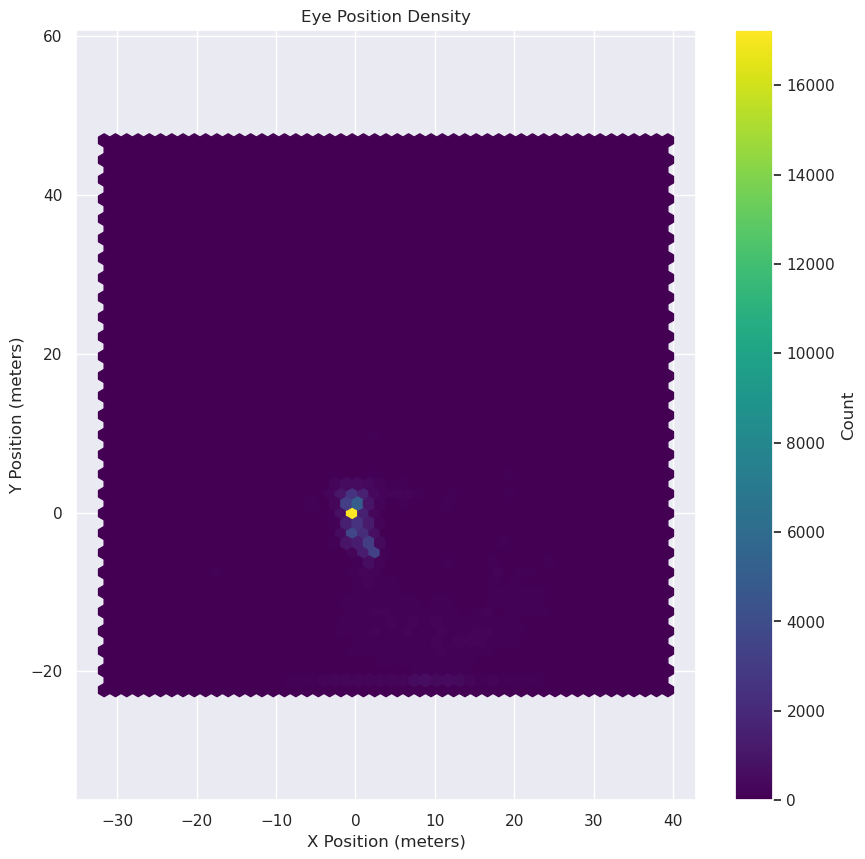

In [10]:
# 2D plot of eye positions
plt.figure(figsize=(10, 10))
plt.scatter(eye_positions[:, 0], eye_positions[:, 1], alpha=0.01, s=1)
plt.xlabel(f'X Position ({eye_data.unit})')
plt.ylabel(f'Y Position ({eye_data.unit})')
plt.title('Eye Position Heatmap')
plt.axis('equal')
plt.grid(True)

# Create a hexbin plot to better visualize density
plt.figure(figsize=(10, 10))
h = plt.hexbin(eye_positions[:, 0], eye_positions[:, 1], gridsize=50, cmap='viridis')
plt.xlabel(f'X Position ({eye_data.unit})')
plt.ylabel(f'Y Position ({eye_data.unit})')
plt.title('Eye Position Density')
plt.colorbar(h, label='Count')
plt.axis('equal')

In [11]:
# Extract hand position data (sampling a subset to manage memory)
hand_data = nwb.processing["behavior"].data_interfaces["hand_position"]
sample_size = 100000  # Sample size to avoid loading too much data
step = len(hand_data.timestamps) // sample_size

# Get the sampled data
hand_timestamps = hand_data.timestamps[::step]
hand_positions = hand_data.data[::step]

print(f"Hand position data: {hand_data.data.shape} total samples")
print(f"Sampled {len(hand_timestamps)} points for visualization")
print(f"Conversion factor: {hand_data.conversion} {hand_data.unit}")
print(f"Reference frame: {hand_data.reference_frame}")

Hand position data: (11810979,) total samples
Sampled 100094 points for visualization
Conversion factor: 1.0 voltage
Reference frame: 0 is maximum left deflection, 5 is maximum right deflection


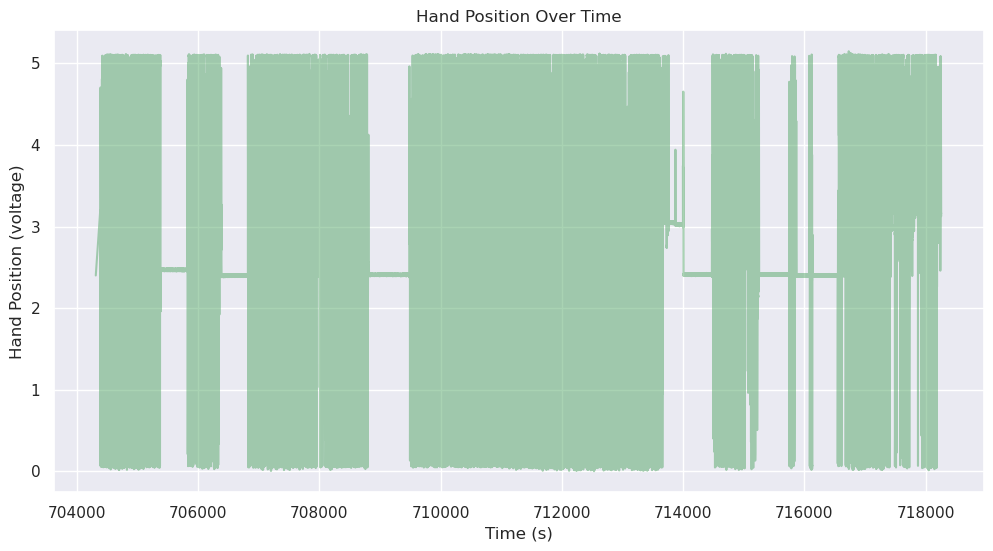

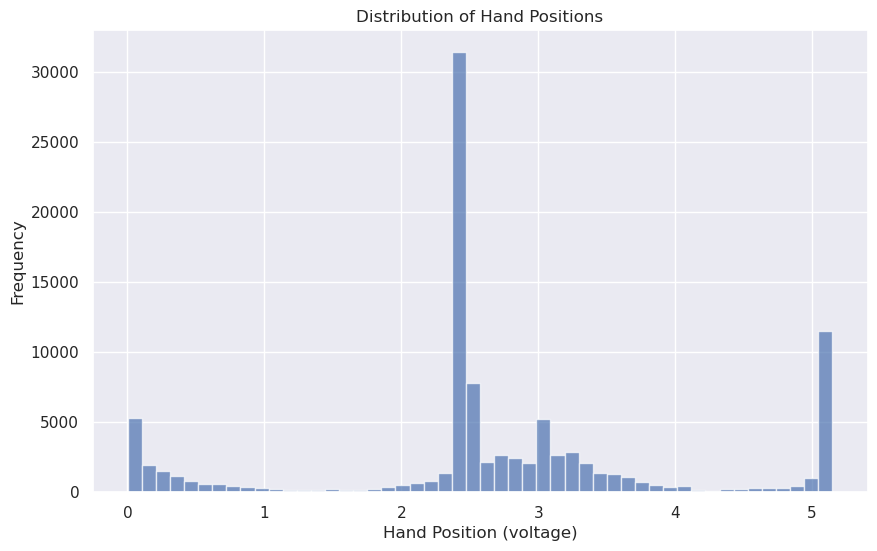

In [12]:
# Plot hand position over time
plt.figure(figsize=(12, 6))
plt.plot(hand_timestamps, hand_positions, 'g-', alpha=0.5)
plt.xlabel('Time (s)')
plt.ylabel(f'Hand Position ({hand_data.unit})')
plt.title('Hand Position Over Time')
plt.grid(True)

# Create a histogram of hand positions
plt.figure(figsize=(10, 6))
plt.hist(hand_positions, bins=50, alpha=0.7)
plt.xlabel(f'Hand Position ({hand_data.unit})')
plt.ylabel('Frequency')
plt.title('Distribution of Hand Positions')
plt.grid(True)

## Neural Data: Exploring Units

Now let's examine the neural data recorded from the posterior parietal cortex (PPC) during this task.

In [13]:
# Get units information
units = nwb.processing["ecephys"].data_interfaces["units"]
units_df = units.to_dataframe()

print(f"Total number of units: {len(units_df)}")
print(f"Columns in units dataframe: {units_df.columns.tolist()}")

# Display a summary of the units
units_df[['unit_name', 'quality', 'n_spikes', 'fr']].head(10)

Total number of units: 68
Columns in units dataframe: ['spike_times', 'unit_name', 'amp', 'ch', 'ContamPct', 'original_cluster_id', 'Amplitude', 'n_spikes', 'depth', 'quality', 'sh', 'KSLabel', 'fr']


,unit_name,quality,n_spikes,fr
id,,,,
0,2,good,97283.0,7.005173
1,3,good,168710.0,12.148501
2,9,noise,76.0,0.005473
3,11,good,159662.0,11.496971
4,12,noise,67926.0,4.891228
5,13,good,205509.0,14.798331
6,14,noise,90960.0,6.549865
7,16,noise,93714.0,6.748175
8,17,noise,45253.0,3.258587


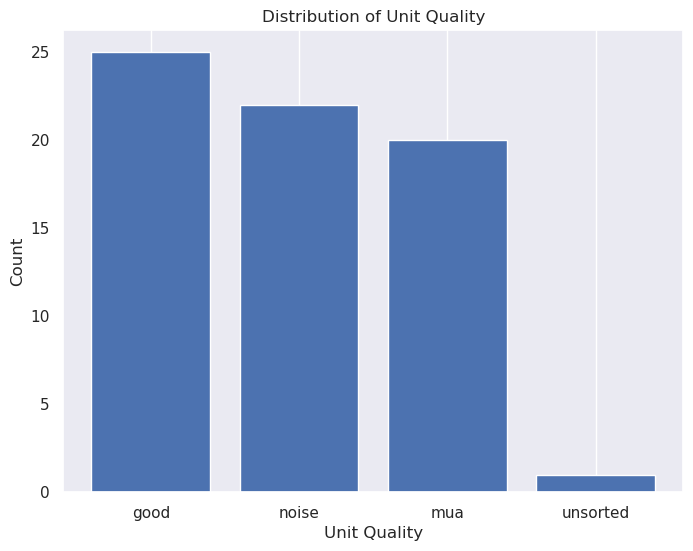

In [14]:
# Analyze unit quality
quality_counts = units_df['quality'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(quality_counts.index, quality_counts.values)
plt.xlabel('Unit Quality')
plt.ylabel('Count')
plt.title('Distribution of Unit Quality')
plt.grid(axis='y')

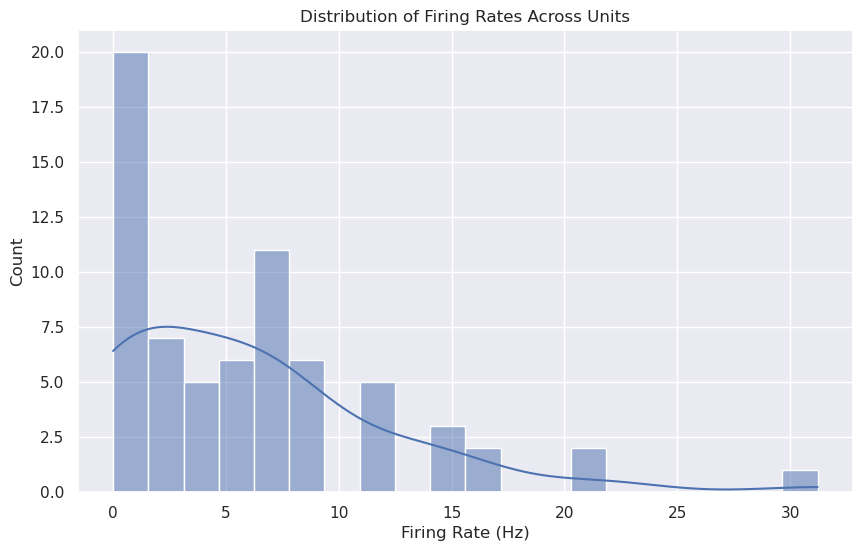

In [15]:
# Analyze firing rates
plt.figure(figsize=(10, 6))
sns.histplot(units_df['fr'], bins=20, kde=True)
plt.xlabel('Firing Rate (Hz)')
plt.ylabel('Count')
plt.title('Distribution of Firing Rates Across Units')
plt.grid(True)

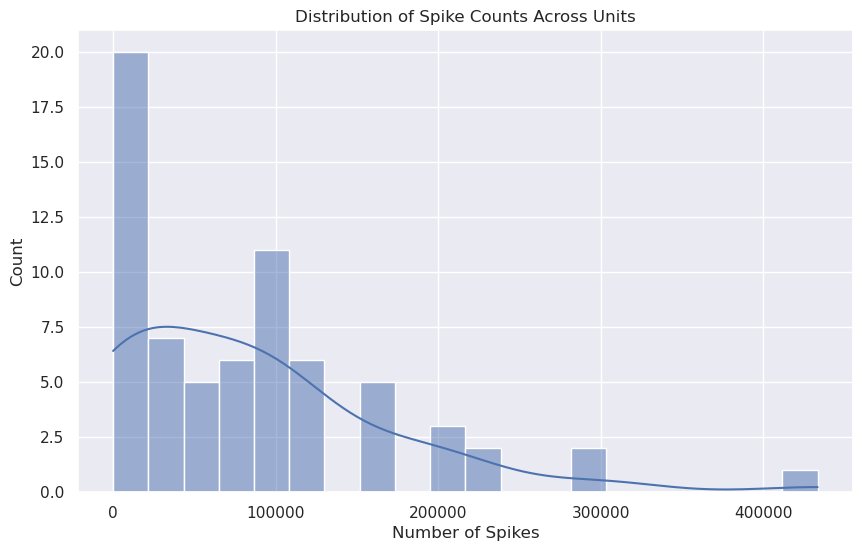

In [16]:
# Analyze spike counts
plt.figure(figsize=(10, 6))
sns.histplot(units_df['n_spikes'], bins=20, kde=True)
plt.xlabel('Number of Spikes')
plt.ylabel('Count')
plt.title('Distribution of Spike Counts Across Units')
plt.grid(True)

## Examining Spike Timing for a Single Unit

Let's look at the spike times for one of the units and examine its activity pattern.

In [17]:
# Choose a unit with good quality and a reasonable number of spikes
good_units = units_df[units_df['quality'] == 'good'].sort_values(by='n_spikes', ascending=False)
if len(good_units) > 0:
    example_unit_id = good_units.index[0]
else:
    # If no good units, pick one with the most spikes
    example_unit_id = units_df.sort_values(by='n_spikes', ascending=False).index[0]

# Get information about this unit
example_unit = units_df.loc[example_unit_id]
print(f"Selected Unit ID: {example_unit_id}")
print(f"Unit Name: {example_unit['unit_name']}")
print(f"Quality: {example_unit['quality']}")
print(f"Firing Rate: {example_unit['fr']} Hz")
print(f"Number of Spikes: {example_unit['n_spikes']}")
print(f"Depth: {example_unit['depth']}")
print(f"Channel: {example_unit['ch']}")

Selected Unit ID: 55
Unit Name: 109
Quality: good
Firing Rate: 31.21619763 Hz
Number of Spikes: 433509.0
Depth: 31.0
Channel: 30.0


Number of spikes: 433509


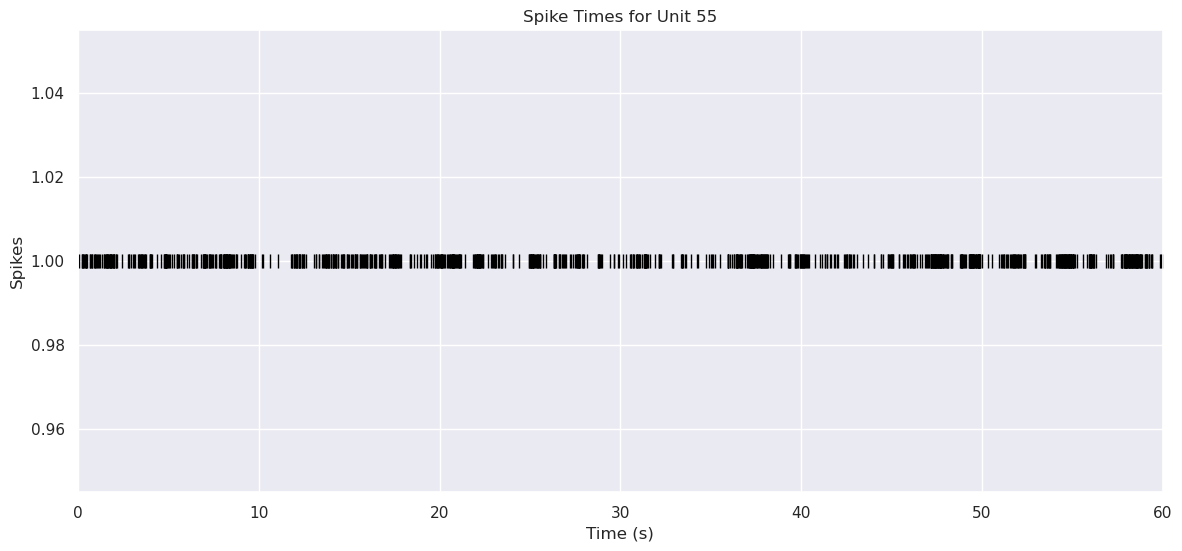

In [18]:
# Get spike times for this unit
spike_times = units.spike_times_index[example_unit_id]
print(f"Number of spikes: {len(spike_times)}")

# Plot spike times
plt.figure(figsize=(14, 6))
plt.plot(spike_times, np.ones_like(spike_times), '|', markersize=10, color='black')
plt.xlabel('Time (s)')
plt.ylabel('Spikes')
plt.title(f'Spike Times for Unit {example_unit_id}')
plt.xlim(0, 60)  # Look at first 60 seconds
plt.grid(True)

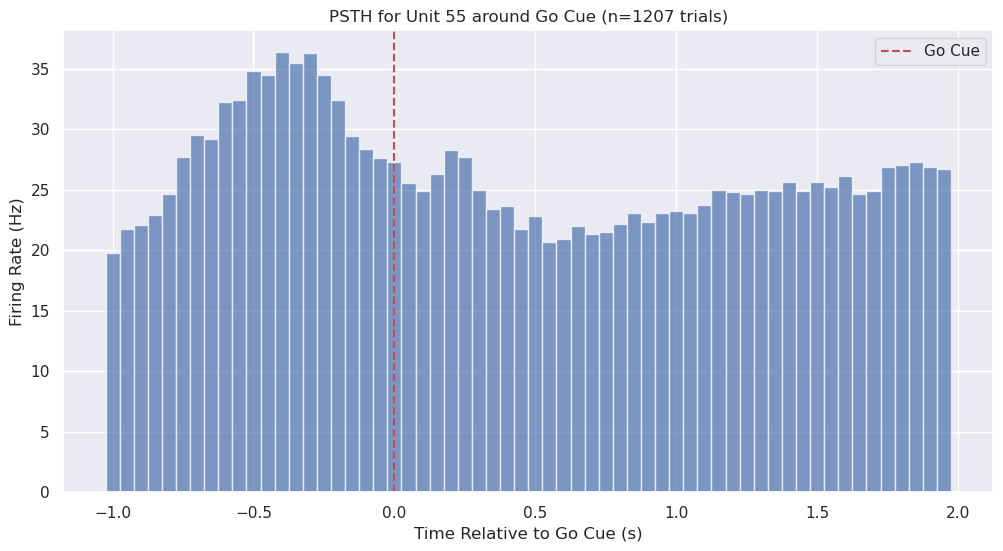

In [19]:
# Create a PSTH (Peri-Stimulus Time Histogram) around go cue
def create_psth(spike_times, event_times, window=(-1, 2), bin_size=0.05):
    """Create a PSTH around specified event times"""
    bins = np.arange(window[0], window[1] + bin_size, bin_size)
    psth = np.zeros(len(bins) - 1)
    count = 0
    
    for event_time in event_times:
        # Find spikes within the window of this event
        mask = ((spike_times >= event_time + window[0]) & 
                (spike_times <= event_time + window[1]))
        if not any(mask):
            continue
        
        relative_times = spike_times[mask] - event_time
        hist, _ = np.histogram(relative_times, bins=bins)
        psth += hist
        count += 1
    
    if count > 0:
        psth = psth / (count * bin_size)  # Convert to firing rate in Hz
    
    return psth, bins[:-1], count

# Use go cue times from valid trials
valid_trials = trials_df[trials_df['validtrials_mm'] == 1]
go_cue_times = valid_trials['gocuettl'].dropna().values

psth, time_bins, trial_count = create_psth(spike_times, go_cue_times)

plt.figure(figsize=(12, 6))
plt.bar(time_bins, psth, width=0.05, alpha=0.7)
plt.axvline(x=0, color='r', linestyle='--', label='Go Cue')
plt.xlabel('Time Relative to Go Cue (s)')
plt.ylabel('Firing Rate (Hz)')
plt.title(f'PSTH for Unit {example_unit_id} around Go Cue (n={trial_count} trials)')
plt.legend()
plt.grid(True)

## Relating Neural Activity to Behavior

Let's examine how neural activity relates to the behavioral aspects of the task, specifically the trial type and success.

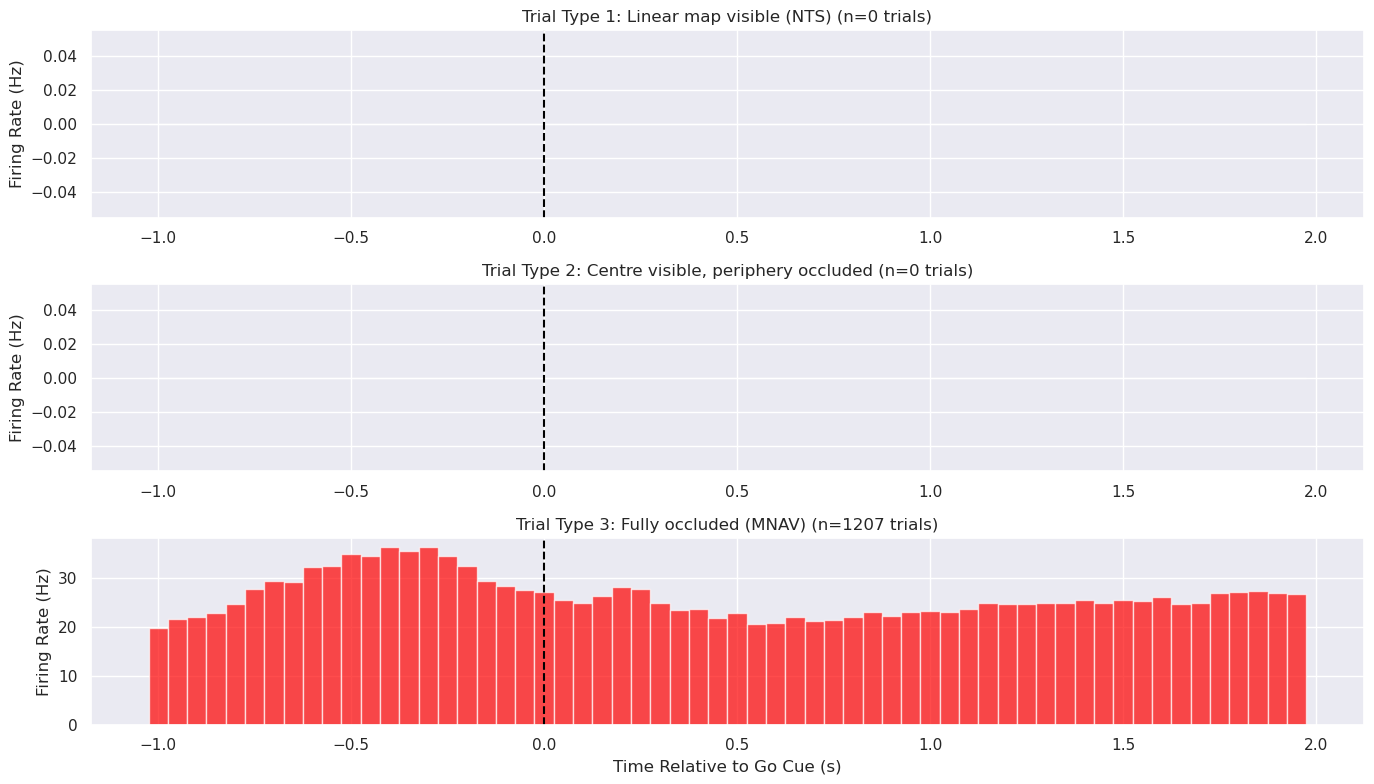

In [20]:
# Explore activity patterns for different trial types
trial_type_labels = [1, 2, 3]  # Different trial types
colors = ['blue', 'green', 'red']

plt.figure(figsize=(14, 8))

for i, trial_type in enumerate(trial_type_labels):
    # Get go cue times for this trial type
    type_trials = trials_df[(trials_df['trial_type'] == trial_type) & 
                            (trials_df['validtrials_mm'] == 1)]
    type_go_cues = type_trials['gocuettl'].dropna().values
    
    # Create PSTH
    psth, time_bins, trial_count = create_psth(spike_times, type_go_cues)
    
    # Plot
    plt.subplot(3, 1, i+1)
    plt.bar(time_bins, psth, width=0.05, alpha=0.7, color=colors[i])
    plt.axvline(x=0, color='black', linestyle='--', label='Go Cue')
    plt.title(f'Trial Type {trial_type}: {trial_types[trial_type]} (n={trial_count} trials)')
    plt.ylabel('Firing Rate (Hz)')
    plt.grid(True)
    
    if i == 2:  # Only add x-label to the bottom subplot
        plt.xlabel('Time Relative to Go Cue (s)')

plt.tight_layout()

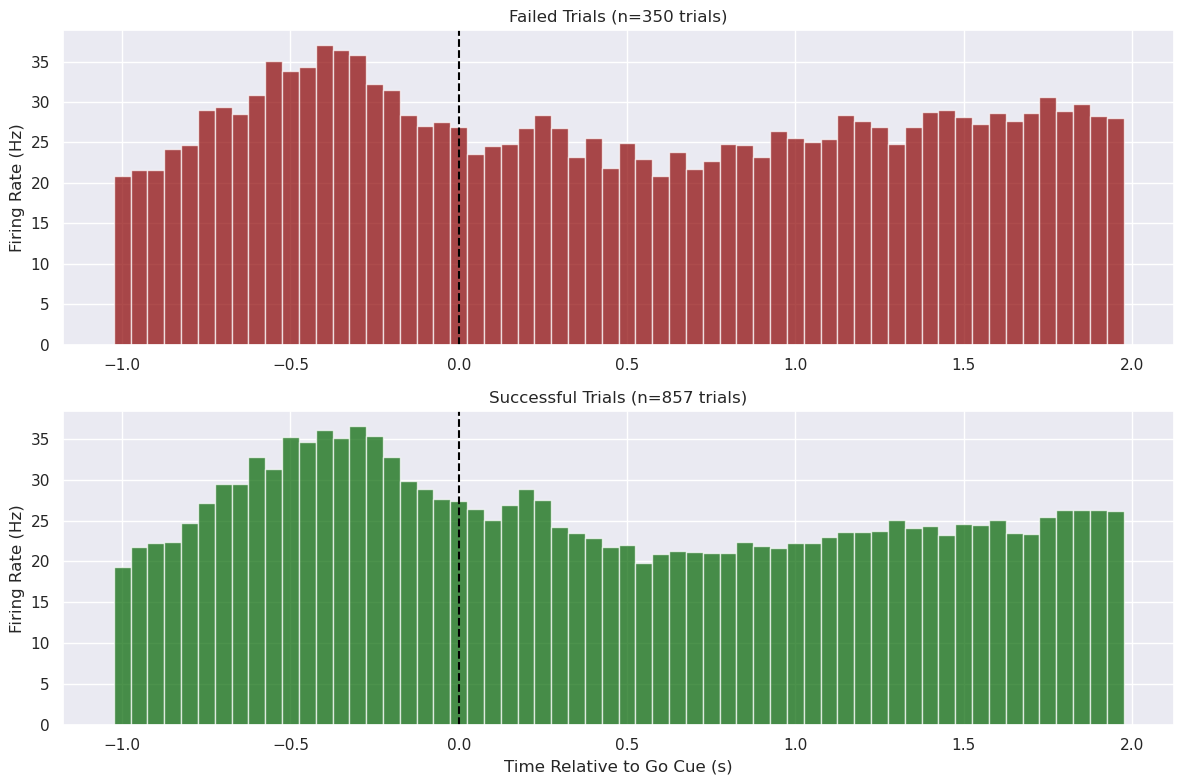

In [21]:
# Compare neural activity between successful and failed trials
success_labels = [0, 1]  # Failed and successful trials
success_colors = ['darkred', 'darkgreen']
success_names = ['Failed', 'Successful']

plt.figure(figsize=(12, 8))

for i, succ in enumerate(success_labels):
    # Get go cue times for this success status
    succ_trials = trials_df[(trials_df['succ'] == succ) & 
                           (trials_df['validtrials_mm'] == 1)]
    succ_go_cues = succ_trials['gocuettl'].dropna().values
    
    # Create PSTH
    psth, time_bins, trial_count = create_psth(spike_times, succ_go_cues)
    
    # Plot
    plt.subplot(2, 1, i+1)
    plt.bar(time_bins, psth, width=0.05, alpha=0.7, color=success_colors[i])
    plt.axvline(x=0, color='black', linestyle='--', label='Go Cue')
    plt.title(f'{success_names[i]} Trials (n={trial_count} trials)')
    plt.ylabel('Firing Rate (Hz)')
    plt.grid(True)
    
    if i == 1:  # Only add x-label to the bottom subplot
        plt.xlabel('Time Relative to Go Cue (s)')

plt.tight_layout()

## Correlating Neural Activity with Task Parameters

Let's look at how neural activity might correlate with specific task parameters like response time.

In [22]:
# Create a scatter plot of response time vs. firing rate in a time window after go cue
def calculate_window_fr(spike_times, event_time, window=(0, 0.5)):
    """Calculate firing rate in a specific time window around an event"""
    mask = ((spike_times >= event_time + window[0]) & 
            (spike_times <= event_time + window[1]))
    spike_count = np.sum(mask)
    window_duration = window[1] - window[0]
    return spike_count / window_duration  # Hz

# Calculate firing rates for each trial
valid_trials = trials_df[trials_df['validtrials_mm'] == 1].copy()
response_window = (0, 0.5)  # Look at 0-500ms after go cue

# This can be computationally intensive, so limit to a reasonable number of trials
max_trials = 200
if len(valid_trials) > max_trials:
    valid_trials = valid_trials.sample(max_trials, random_state=42)

firing_rates = []
for idx, trial in valid_trials.iterrows():
    if pd.isna(trial['gocuettl']) or pd.isna(trial['rt']):
        firing_rates.append(np.nan)
        continue
    fr = calculate_window_fr(spike_times, trial['gocuettl'], response_window)
    firing_rates.append(fr)

valid_trials['post_cue_fr'] = firing_rates
valid_trials = valid_trials.dropna(subset=['post_cue_fr', 'rt'])

Text(0.05, 0.95, 'Correlation: 0.108')

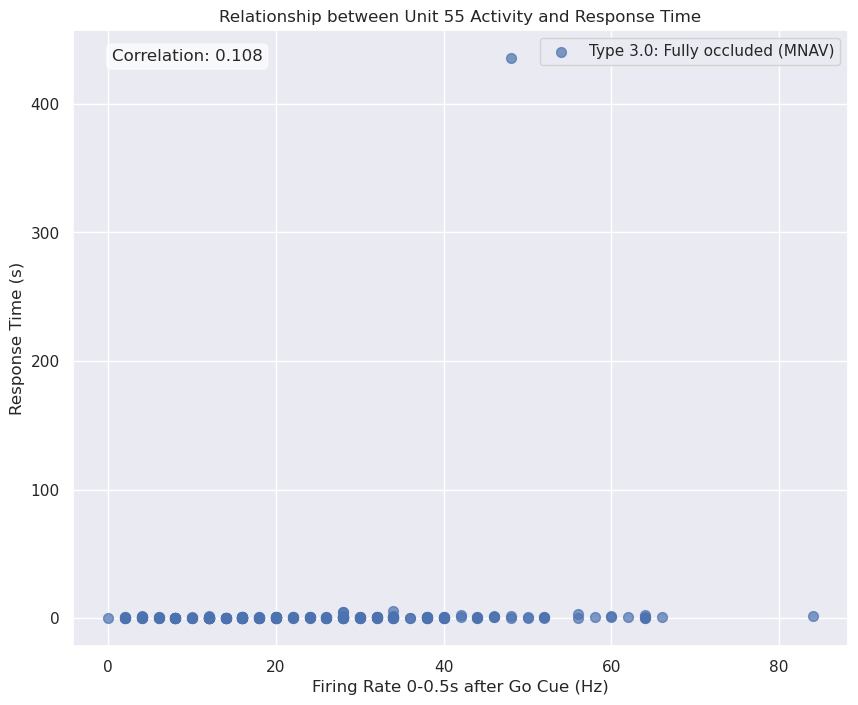

In [23]:
# Plot the relationship between firing rate and response time
plt.figure(figsize=(10, 8))

for i, (trial_type, df_group) in enumerate(valid_trials.groupby('trial_type')):
    plt.scatter(df_group['post_cue_fr'], df_group['rt'], 
                label=f'Type {trial_type}: {trial_types[trial_type]}',
                alpha=0.7, s=50)

plt.xlabel(f'Firing Rate {response_window[0]}-{response_window[1]}s after Go Cue (Hz)')
plt.ylabel('Response Time (s)')
plt.title(f'Relationship between Unit {example_unit_id} Activity and Response Time')
plt.legend()
plt.grid(True)

# Calculate correlation
correlation = valid_trials['post_cue_fr'].corr(valid_trials['rt'])
plt.annotate(f'Correlation: {correlation:.3f}', xy=(0.05, 0.95), 
             xycoords='axes fraction', fontsize=12,
             bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.7))

## Examining Electrodes and Recording Locations

Let's look at the electrode information to understand the recording setup.

In [24]:
# Get electrode information
electrodes_df = nwb.electrodes.to_dataframe()
print(f"Number of electrodes: {len(electrodes_df)}")
electrodes_df.head()

Number of electrodes: 32


,location,group,group_name,channel_name,rel_x,offset_to_uV,rel_y,gain_to_uV
id,,,,,,,,
0,unknown,vprobe0 pynwb.ecephys.ElectrodeGroup at 0x1397...,vprobe0,0,0.0,0.0,0.0,1.0
1,unknown,vprobe0 pynwb.ecephys.ElectrodeGroup at 0x1397...,vprobe0,1,0.0,0.0,100.0,1.0
2,unknown,vprobe0 pynwb.ecephys.ElectrodeGroup at 0x1397...,vprobe0,2,0.0,0.0,200.0,1.0
3,unknown,vprobe0 pynwb.ecephys.ElectrodeGroup at 0x1397...,vprobe0,3,0.0,0.0,300.0,1.0
4,unknown,vprobe0 pynwb.ecephys.ElectrodeGroup at 0x1397...,vprobe0,4,0.0,0.0,400.0,1.0


(-0.05500000000000001, 0.05500000000000001, -155.0, 3255.0)

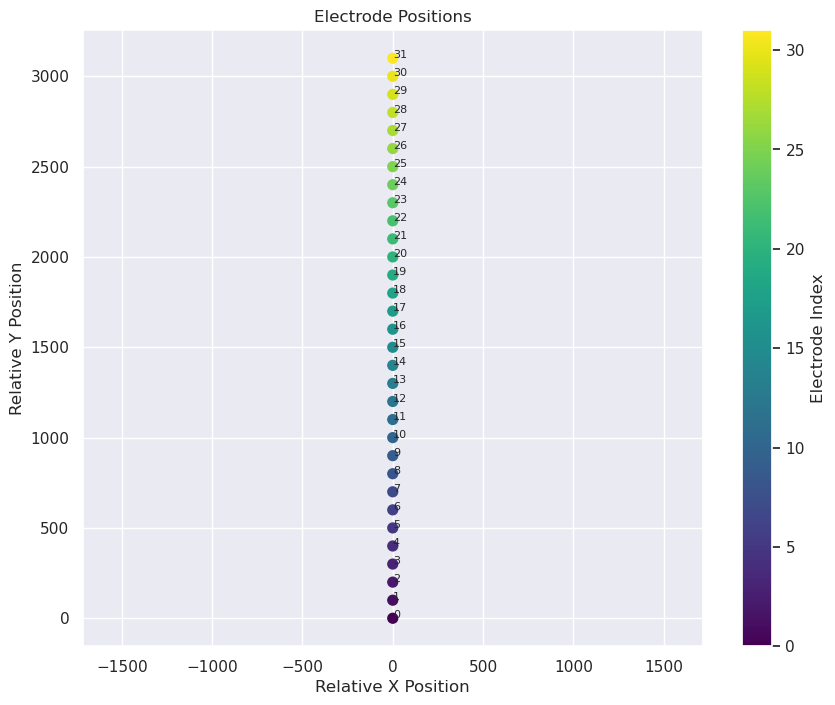

In [25]:
# Visualize electrode relative positions
plt.figure(figsize=(10, 8))
plt.scatter(electrodes_df['rel_x'], electrodes_df['rel_y'], s=50, c=range(len(electrodes_df)), cmap='viridis')
for i, row in electrodes_df.iterrows():
    plt.text(row['rel_x'], row['rel_y'], str(i), fontsize=8)
plt.xlabel('Relative X Position')
plt.ylabel('Relative Y Position')
plt.title('Electrode Positions')
plt.colorbar(label='Electrode Index')
plt.grid(True)
plt.axis('equal')

## Trial Parameter Analysis

Let's analyze the behavioral variables in the trial data to better understand the experimental task.

(-3.575, 3.575, -10.70748495, 104.22416595)

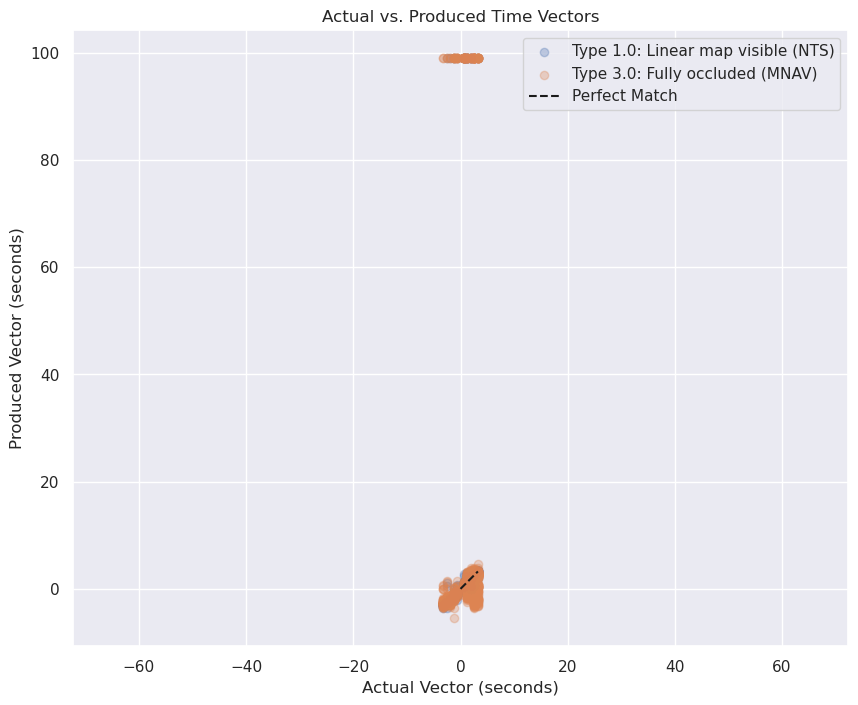

In [26]:
# Analyze the relationship between actual and produced vectors (ta and tp)
plt.figure(figsize=(10, 8))

for trial_type, df_group in trials_df.groupby('trial_type'):
    plt.scatter(df_group['ta'], df_group['tp'], alpha=0.3, 
                label=f'Type {trial_type}: {trial_types[trial_type]}')

plt.plot([0, trials_df['ta'].max()], [0, trials_df['ta'].max()], 'k--', label='Perfect Match')
plt.xlabel('Actual Vector (seconds)')
plt.ylabel('Produced Vector (seconds)')
plt.title('Actual vs. Produced Time Vectors')
plt.legend()
plt.grid(True)
plt.axis('equal')

/tmp/ipykernel_18709/1527334567.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='trial_type', y='rt', data=trials_df,


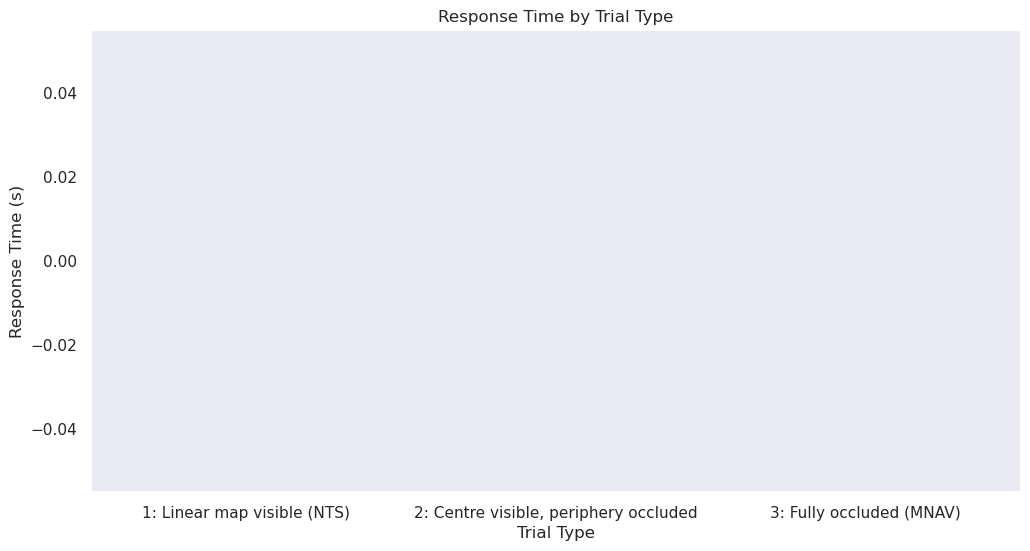

In [27]:
# Analyze response time (rt) distribution across trial types using violin plot instead of boxplot
plt.figure(figsize=(12, 6))

# Use violinplot which is more reliable across seaborn versions
sns.violinplot(x='trial_type', y='rt', data=trials_df, 
              order=[1, 2, 3], palette='Set3', inner='box')
# Add individual points
sns.stripplot(x='trial_type', y='rt', data=trials_df.sample(min(500, len(trials_df))), 
             order=[1, 2, 3], color='black', alpha=0.3, jitter=True)

plt.xlabel('Trial Type')
plt.ylabel('Response Time (s)')
plt.title('Response Time by Trial Type')
plt.xticks([0, 1, 2], [f"{i}: {trial_types[i]}" for i in [1, 2, 3]])
plt.grid(axis='y')

/tmp/ipykernel_18709/248993720.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(x='delay', y='rt', hue='trial_type', data=trials_df,


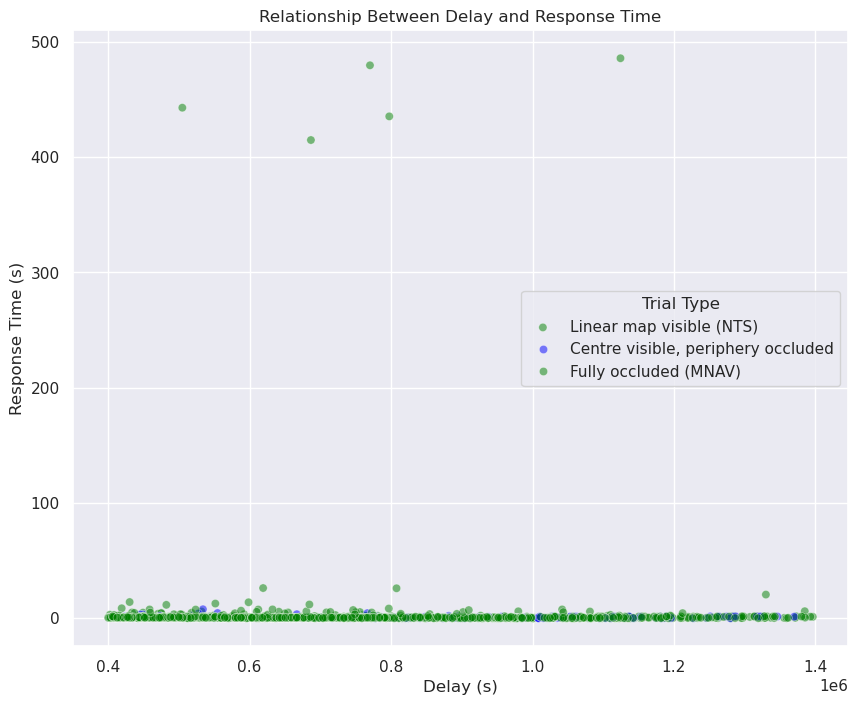

In [28]:
# Examine the relationship between delay and response time
plt.figure(figsize=(10, 8))
sns.scatterplot(x='delay', y='rt', hue='trial_type', data=trials_df, 
                palette=['blue', 'green', 'red'], alpha=0.5)
plt.xlabel('Delay (s)')
plt.ylabel('Response Time (s)')
plt.title('Relationship Between Delay and Response Time')
plt.legend(title='Trial Type', labels=[trial_types[i] for i in [1, 2, 3]])
plt.grid(True)

## Summary and Conclusions

In this notebook, we've explored the Dandiset 001275, which contains neurophysiology data from macaques performing a mental navigation task. We've:

1. **Loaded and examined the dataset structure** using the DANDI API
2. **Explored behavioral data** including eye and hand positions, revealing patterns of visual attention and motor responses
3. **Analyzed neural activity** from the posterior parietal cortex (PPC), including:
   - Distributions of unit quality, firing rates, and spike counts
   - Detailed analysis of a single unit's activity patterns
   - Neural responses to experimental events (go cues)
   - Correlations between neural activity and behavioral measures
4. **Examined trial information** to understand the experimental design and task parameters

The data shows interesting patterns of neural activity related to mental navigation. PPC neurons appear to respond differently based on trial type (whether visual guidance was available) and trial outcome (success vs. failure). These findings align with the role of PPC in spatial navigation and movement planning.

### Future Directions

Several potential analyses could extend this work:

1. **Population-level analysis**: Examine patterns across multiple neurons to identify population coding of navigation parameters
2. **Temporal dynamics**: Analyze how neural representations evolve throughout the trial
3. **Decoding analysis**: Attempt to decode behavioral variables from neural activity
4. **Comparison across sessions**: Compare neural responses across different recording sessions and subjects
5. **Integration with EC data**: Correlate these PPC findings with the entorhinal cortex data mentioned in the dataset description

These neural recordings from non-human primates during mental navigation provide valuable insights into the neural basis of cognitive mapping and spatial navigation.